# ARIMA for 0118.KL

## Data Preparation

In [93]:
#general
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import yfinance as yf
from pmdarima.arima import ADFTest
from pandas_datareader import data as pdr

In [94]:
def check(x):
    adf = ADFTest()
    print("ADF:",adf.is_stationary(x)[1])

In [103]:
yf.pdr_override()
#load ticker for stock
df = pdr.get_data_yahoo("0118.KL", period="max", end="2020-04-30")
df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]
# Change all column headings to be lower case, and remove spacing
df.tail()

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,adj_close,volume
Date,,,,,,
2020-04-23,0.005,0.01,0.005,0.010,0.010,334100
2020-04-24,0.005,0.01,0.005,0.010,0.010,470000
2020-04-27,0.005,0.01,0.005,0.005,0.005,3648200
2020-04-28,0.005,0.01,0.005,0.010,0.010,477100
2020-04-29,0.010,0.01,0.005,0.010,0.010,2570100


In [104]:
df = df.filter(items=['adj_close'])
check(df)

ADF: True


C:\Users\darre\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  This is separate from the ipykernel package so we can avoid doing imports until


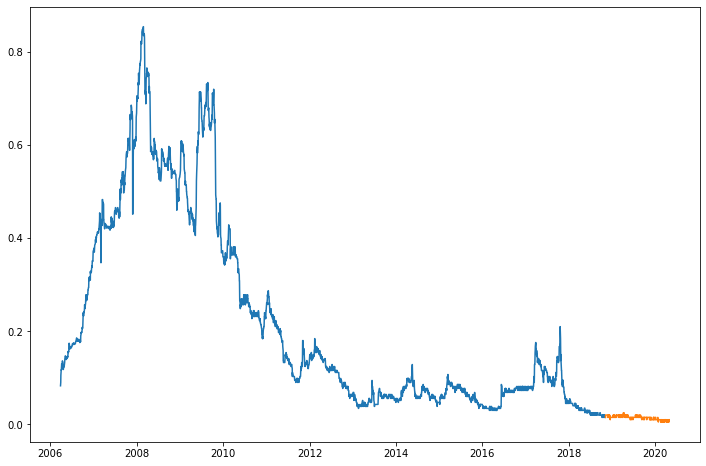

In [111]:
n=367
train = df[:-n]
test = df[-n:]
plt.figure(figsize=(12,8))
plt.plot(train)
plt.plot(test)
plt.show()

## Training the model

In [112]:
from pmdarima import auto_arima

model = auto_arima(train,trace=True,m=7,error_action='ignore', suppress_warnings=True)
model.fit(train)

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(1,0,1,7) [intercept=True]; AIC=-20890.762, BIC=-20842.413, Time=6.383 seconds
Fit ARIMA(0,1,0)x(0,0,0,7) [intercept=True]; AIC=-20863.828, BIC=-20851.741, Time=0.551 seconds
Fit ARIMA(1,1,0)x(1,0,0,7) [intercept=True]; AIC=-20894.979, BIC=-20870.805, Time=0.943 seconds
Fit ARIMA(0,1,1)x(0,0,1,7) [intercept=True]; AIC=-20895.982, BIC=-20871.808, Time=3.103 seconds
Fit ARIMA(0,1,0)x(0,0,0,7) [intercept=False]; AIC=-20865.808, BIC=-20859.764, Time=0.124 seconds
Fit ARIMA(0,1,1)x(0,0,0,7) [intercept=True]; AIC=-20873.438, BIC=-20855.307, Time=0.366 seconds
Fit ARIMA(0,1,1)x(1,0,1,7) [intercept=True]; AIC=-20894.375, BIC=-20864.157, Time=1.207 seconds
Fit ARIMA(0,1,1)x(0,0,2,7) [intercept=True]; AIC=-20895.205, BIC=-20864.987, Time=2.248 seconds
Fit ARIMA(0,1,1)x(1,0,0,7) [intercept=True]; AIC=-20894.612, BIC=-20870.438, Time=1.362 seconds
Fit ARIMA(0,1,1)x(1,0,2,7) [intercept=True]; AIC=-20893.208, BIC=-20856.946, Time=2.680 seco

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 1, 7),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

## Forecasting on the dataset

In [113]:
forecast = model.predict(n_periods=n)
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

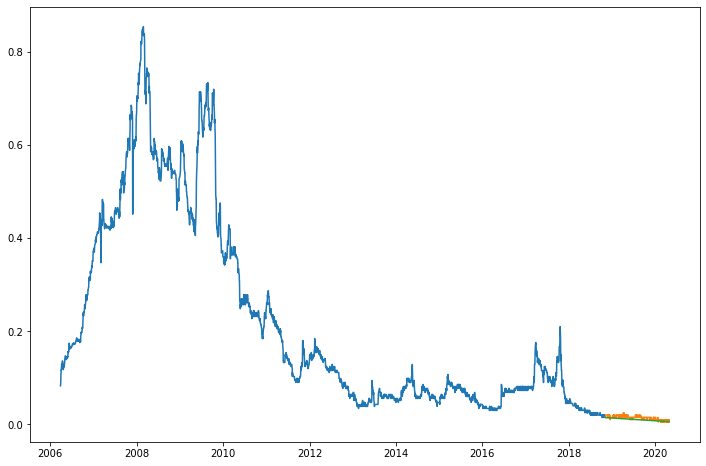

In [114]:
plt.figure(figsize=(12,8))
plt.plot(train, label='Train')
plt.plot(test, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

## Evaluating the training model

In [115]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(test,forecast['Prediction']))

2.4450253737399626e-05


## Forecasting beyond the dataset

In [116]:
model.update(test)

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 1, 7),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [117]:
dates = pd.date_range(start='2020-05-01', periods=n)

In [118]:
forecast = model.predict(n_periods=n)
forecast = pd.DataFrame(forecast,index = dates,columns=['Prediction'])

In [119]:
forecast.tail()

,Prediction
2021-04-28,0.001581
2021-04-29,0.001557
2021-04-30,0.001532
2021-05-01,0.001507
2021-05-02,0.001483


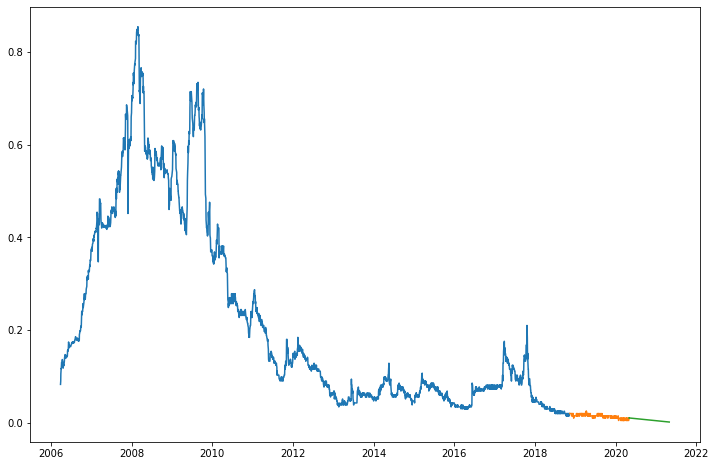

In [81]:
plt.figure(figsize=(12,8))
plt.plot(train,label="Train")
plt.plot(test,label='Test')
plt.plot(forecast,label='Forecast')
plt.show()